In [1]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os

import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


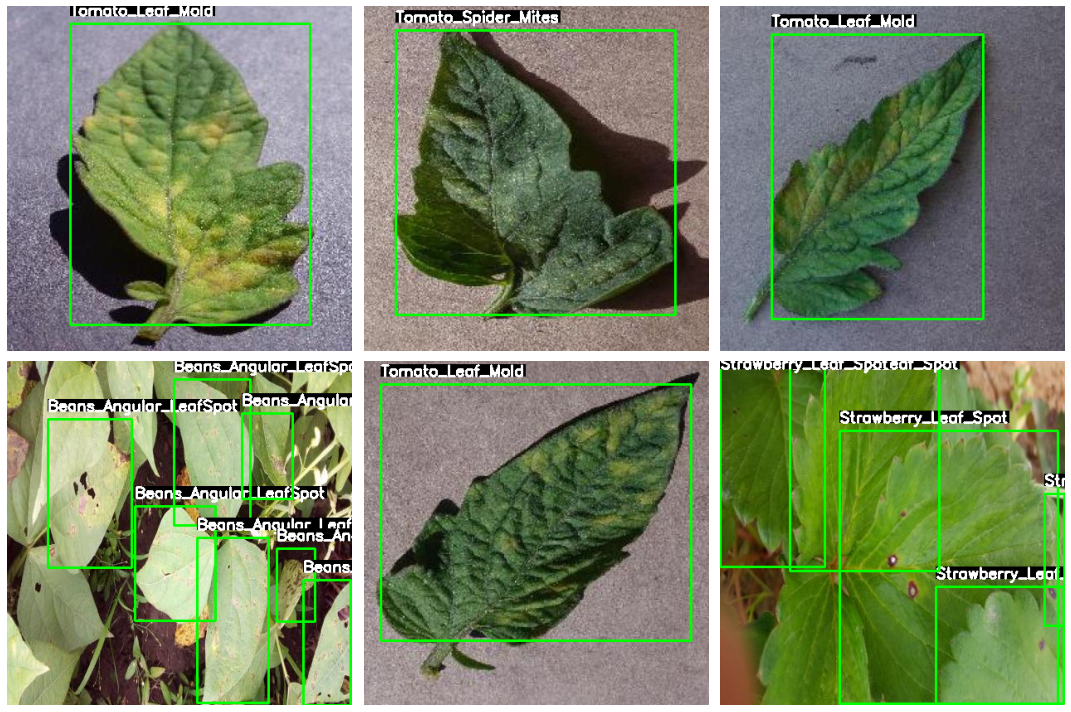

In [2]:
import yaml
random.seed(42)

# Папки с изображениями и метками
images_folder = "train/images"
labels_folder = "train/labels"

# Загрузка списка файлов изображений
image_files = os.listdir(images_folder)

# Выбор случайных изображений
random.shuffle(image_files)
random_image_files = image_files[:6]

# Отображение случайных изображений с метками
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()


with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)
classes = data["names"]  # Список классов

for i in range(num_images):
    # Загрузка изображения
    image_file = os.path.join(images_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Загрузка меток из файла
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    if not os.path.exists(label_file):
        continue
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Отображение изображения с метками
    h, w, _ = image.shape
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.strip().split())

        # Перевод YOLO координат в координаты прямоугольника
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Настройка уменьшенной толщины и текста
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Толщина = 1
        class_name = classes[int(class_id)] if int(class_id) < len(classes) else f"Class {int(class_id)}"

        font_scale = 0.6
        thickness = 2
        text_size = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 10

        # Фон под текстом (для четкости)
        cv2.rectangle(image, (text_x, text_y - text_size[1]), (text_x + text_size[0], text_y), (0, 0, 0), -1)
        cv2.putText(image, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # Отображение изображения
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [3]:
model = YOLO("yolo11s.pt")

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
model.train(data='data.yaml ', epochs=80, imgsz=416,
            optimizer = 'AdamW', lr0 = 1e-3, 
            project = 'YOLO11s', name='Small_try',
            batch=32, device=device, seed=69)

New https://pypi.org/project/ultralytics/8.3.82 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=data.yaml , epochs=80, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=YOLO11s, name=Small_try, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frame

train: Scanning /home/user/CourseWork/Disease/train/labels.cache... 2904 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2904/2904 [00:00<?, ?it/s]
val: Scanning /home/user/CourseWork/Disease/valid/labels.cache... 1416 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1416/1416 [00:00<?, ?it/s]


Plotting labels to YOLO11s/Small_try/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to YOLO11s/Small_try
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      3.49G      1.174      2.127      1.382         89        416: 100%|██████████| 91/91 [00:14<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.43it/s]


                   all       1416       3193      0.389       0.37      0.325      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      3.47G      1.167      1.582      1.352         95        416: 100%|██████████| 91/91 [00:12<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.52it/s]


                   all       1416       3193      0.447      0.561       0.49       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      3.51G      1.142      1.454      1.338        108        416: 100%|██████████| 91/91 [00:13<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.55it/s]


                   all       1416       3193      0.545      0.521      0.491      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      3.47G      1.144      1.434      1.345        118        416: 100%|██████████| 91/91 [00:11<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.62it/s]


                   all       1416       3193      0.474      0.478      0.414      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80       3.5G      1.115      1.356      1.327        123        416: 100%|██████████| 91/91 [00:11<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.66it/s]

                   all       1416       3193       0.57      0.574      0.602      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      3.46G      1.075      1.302      1.298         92        416: 100%|██████████| 91/91 [00:11<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.69it/s]

                   all       1416       3193      0.717      0.692       0.71      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      3.51G      1.046      1.223      1.285         88        416: 100%|██████████| 91/91 [00:12<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.63it/s]

                   all       1416       3193      0.624      0.611      0.648      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      3.48G      1.036      1.172      1.275         94        416: 100%|██████████| 91/91 [00:11<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.61it/s]

                   all       1416       3193      0.702      0.647      0.707      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      3.49G      1.018       1.16       1.26        120        416: 100%|██████████| 91/91 [00:11<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.59it/s]

                   all       1416       3193      0.651      0.644      0.667      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      3.46G     0.9839      1.123      1.255         82        416: 100%|██████████| 91/91 [00:11<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.70it/s]

                   all       1416       3193      0.739       0.73      0.751      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      3.48G     0.9725      1.088      1.242         84        416: 100%|██████████| 91/91 [00:11<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.74it/s]

                   all       1416       3193      0.733      0.725      0.755      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      3.47G     0.9747      1.062      1.228         95        416: 100%|██████████| 91/91 [00:12<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.66it/s]

                   all       1416       3193      0.751      0.745       0.77      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80       3.5G     0.9721      1.043      1.234         81        416: 100%|██████████| 91/91 [00:12<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.60it/s]

                   all       1416       3193       0.65      0.677      0.655      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      3.46G     0.9463      1.023      1.218         99        416: 100%|██████████| 91/91 [00:11<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.57it/s]

                   all       1416       3193       0.76      0.777      0.805      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      3.51G     0.9374     0.9818      1.212        100        416: 100%|██████████| 91/91 [00:11<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.68it/s]

                   all       1416       3193      0.757      0.703      0.746       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      3.47G     0.9374      0.988      1.211         96        416: 100%|██████████| 91/91 [00:12<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.65it/s]

                   all       1416       3193      0.784      0.761      0.808      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80       3.5G     0.9308     0.9717      1.205         79        416: 100%|██████████| 91/91 [00:12<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.71it/s]

                   all       1416       3193      0.768      0.751      0.806       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      3.47G     0.8974     0.9376      1.189        112        416: 100%|██████████| 91/91 [00:11<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.76it/s]

                   all       1416       3193      0.811      0.777      0.825      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80       3.5G     0.9058     0.9405      1.194        131        416: 100%|██████████| 91/91 [00:11<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.77it/s]

                   all       1416       3193      0.819      0.768      0.824      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      3.48G     0.9009     0.9418      1.184        121        416: 100%|██████████| 91/91 [00:11<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.72it/s]

                   all       1416       3193      0.773      0.751      0.811      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      3.49G      0.888     0.9259      1.178        113        416: 100%|██████████| 91/91 [00:12<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.82it/s]

                   all       1416       3193      0.826      0.797      0.841      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      3.46G     0.8814     0.8819      1.174        111        416: 100%|██████████| 91/91 [00:11<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.74it/s]

                   all       1416       3193      0.788      0.781      0.817      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80       3.5G     0.8824     0.9128      1.183         98        416: 100%|██████████| 91/91 [00:11<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.73it/s]

                   all       1416       3193      0.764      0.761      0.802      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      3.47G     0.8796     0.8697      1.176         92        416: 100%|██████████| 91/91 [00:12<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.70it/s]

                   all       1416       3193      0.807        0.8       0.84      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80       3.5G     0.8677     0.8586      1.164        138        416: 100%|██████████| 91/91 [00:11<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.64it/s]

                   all       1416       3193        0.8      0.803      0.839       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      3.46G      0.851     0.8448      1.158        115        416: 100%|██████████| 91/91 [00:12<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.74it/s]

                   all       1416       3193      0.805       0.78      0.827      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      3.48G     0.8551     0.8399      1.157         97        416: 100%|██████████| 91/91 [00:11<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.73it/s]

                   all       1416       3193       0.81      0.787      0.827      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80       3.6G     0.8494     0.8286       1.16         92        416: 100%|██████████| 91/91 [00:11<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.79it/s]

                   all       1416       3193      0.822      0.814      0.849      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80       3.5G     0.8421     0.8154      1.154         83        416: 100%|██████████| 91/91 [00:11<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.86it/s]

                   all       1416       3193       0.79      0.812      0.835      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80       3.6G     0.8367     0.8235      1.145        114        416: 100%|██████████| 91/91 [00:10<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.67it/s]

                   all       1416       3193      0.822      0.814      0.857      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80       3.5G     0.8289     0.7979      1.148         90        416: 100%|██████████| 91/91 [00:11<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.76it/s]

                   all       1416       3193       0.85      0.818      0.862      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      3.59G     0.8393     0.7996      1.156        109        416: 100%|██████████| 91/91 [00:11<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.68it/s]

                   all       1416       3193       0.82      0.837      0.858      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      3.49G     0.8225     0.7685      1.138        102        416: 100%|██████████| 91/91 [00:11<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.74it/s]

                   all       1416       3193      0.817      0.827      0.852      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      3.58G      0.817     0.7681      1.138         86        416: 100%|██████████| 91/91 [00:11<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.81it/s]

                   all       1416       3193       0.84      0.835      0.867      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      3.48G     0.8096     0.7626      1.134         89        416: 100%|██████████| 91/91 [00:11<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.78it/s]

                   all       1416       3193      0.834      0.832       0.86      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      3.58G      0.806     0.7521      1.131        107        416: 100%|██████████| 91/91 [00:11<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.79it/s]

                   all       1416       3193      0.818      0.828       0.86      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      3.48G      0.817     0.7517       1.14         96        416: 100%|██████████| 91/91 [00:12<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.83it/s]

                   all       1416       3193      0.825      0.818      0.855      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      3.57G      0.799     0.7308      1.124         83        416: 100%|██████████| 91/91 [00:11<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.73it/s]

                   all       1416       3193      0.823      0.837       0.87      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80       3.5G     0.7897     0.7311       1.12        115        416: 100%|██████████| 91/91 [00:11<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.85it/s]

                   all       1416       3193      0.852      0.834      0.881      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      3.58G     0.7887     0.7114      1.118        107        416: 100%|██████████| 91/91 [00:12<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.87it/s]

                   all       1416       3193       0.88       0.83       0.88      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80       3.5G      0.798     0.7302      1.127        104        416: 100%|██████████| 91/91 [00:12<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.91it/s]

                   all       1416       3193      0.837      0.853      0.875      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      3.58G     0.7946     0.7188      1.121        111        416: 100%|██████████| 91/91 [00:11<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.78it/s]

                   all       1416       3193      0.857      0.832      0.876      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80       3.5G      0.775     0.6965      1.112        110        416: 100%|██████████| 91/91 [00:11<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.86it/s]

                   all       1416       3193      0.854      0.844      0.877      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      3.47G     0.7824     0.6972      1.115        106        416: 100%|██████████| 91/91 [00:11<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.82it/s]

                   all       1416       3193      0.831      0.853      0.872      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      3.48G     0.7746     0.6928      1.111         89        416: 100%|██████████| 91/91 [00:12<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.80it/s]

                   all       1416       3193      0.847      0.841      0.884      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      3.59G     0.7656     0.6713      1.103         93        416: 100%|██████████| 91/91 [00:11<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.96it/s]

                   all       1416       3193      0.861      0.832      0.878      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      3.48G     0.7709     0.6842      1.112        117        416: 100%|██████████| 91/91 [00:11<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.89it/s]

                   all       1416       3193      0.875      0.839      0.888      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      3.57G     0.7699     0.6659      1.109         85        416: 100%|██████████| 91/91 [00:11<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.85it/s]

                   all       1416       3193      0.852      0.865      0.887      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80       3.5G     0.7614     0.6687       1.11        104        416: 100%|██████████| 91/91 [00:11<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.86it/s]

                   all       1416       3193      0.864      0.836      0.882      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80       3.6G     0.7522     0.6496        1.1        109        416: 100%|██████████| 91/91 [00:11<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.88it/s]

                   all       1416       3193      0.856      0.869      0.893      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80       3.5G     0.7482     0.6505      1.099         92        416: 100%|██████████| 91/91 [00:11<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.88it/s]

                   all       1416       3193      0.884      0.855      0.901      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80       3.6G     0.7353     0.6411      1.087        133        416: 100%|██████████| 91/91 [00:11<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.89it/s]

                   all       1416       3193      0.884      0.852      0.901       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      3.49G     0.7259     0.6244      1.082        110        416: 100%|██████████| 91/91 [00:12<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.81it/s]

                   all       1416       3193      0.875      0.857      0.894      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      3.59G      0.737     0.6303      1.086        106        416: 100%|██████████| 91/91 [00:12<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.92it/s]

                   all       1416       3193      0.883      0.863      0.901      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      3.49G     0.7396     0.6397      1.089         97        416: 100%|██████████| 91/91 [00:12<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.76it/s]

                   all       1416       3193      0.889      0.855      0.896      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      3.57G     0.7304     0.6259      1.093        105        416: 100%|██████████| 91/91 [00:11<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.75it/s]

                   all       1416       3193      0.882      0.857      0.899      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      3.49G     0.7233      0.617      1.082        113        416: 100%|██████████| 91/91 [00:11<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.67it/s]

                   all       1416       3193      0.884      0.847      0.898      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      3.58G     0.7251     0.6038      1.082        111        416: 100%|██████████| 91/91 [00:12<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.72it/s]

                   all       1416       3193      0.875      0.872      0.901       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80       3.5G     0.7244     0.6044      1.083        134        416: 100%|██████████| 91/91 [00:12<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.81it/s]

                   all       1416       3193      0.877      0.873        0.9       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      3.57G     0.7172     0.6129      1.076        135        416: 100%|██████████| 91/91 [00:12<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.83it/s]

                   all       1416       3193      0.882      0.877      0.909      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80       3.5G     0.7059     0.5847      1.069         87        416: 100%|██████████| 91/91 [00:12<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.77it/s]

                   all       1416       3193      0.897       0.86      0.907      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      3.43G     0.7068     0.5828      1.073         89        416: 100%|██████████| 91/91 [00:12<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.84it/s]

                   all       1416       3193      0.894      0.869      0.907      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80       3.5G     0.7043     0.5767      1.076        121        416: 100%|██████████| 91/91 [00:12<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.79it/s]

                   all       1416       3193       0.88      0.886      0.906      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80       3.6G     0.7051     0.5789      1.072         95        416: 100%|██████████| 91/91 [00:12<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.80it/s]

                   all       1416       3193      0.893      0.871      0.908      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      3.49G      0.697     0.5689      1.069         98        416: 100%|██████████| 91/91 [00:12<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.72it/s]

                   all       1416       3193      0.898      0.872      0.913      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      3.58G     0.6968     0.5691       1.07        125        416: 100%|██████████| 91/91 [00:12<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.69it/s]

                   all       1416       3193      0.887       0.88      0.908      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      3.51G     0.6891     0.5554      1.065        117        416: 100%|██████████| 91/91 [00:12<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.65it/s]

                   all       1416       3193      0.914      0.863       0.91      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      3.59G       0.69     0.5626      1.064         85        416: 100%|██████████| 91/91 [00:12<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.75it/s]

                   all       1416       3193      0.877       0.88      0.904      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      3.51G     0.6867     0.5458      1.064         78        416: 100%|██████████| 91/91 [00:11<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.78it/s]

                   all       1416       3193      0.911      0.873      0.913       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      3.45G     0.6831     0.5528      1.061        127        416: 100%|██████████| 91/91 [00:11<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.84it/s]

                   all       1416       3193      0.889      0.883      0.907      0.748


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      3.49G     0.5811     0.4402     0.9889         51        416: 100%|██████████| 91/91 [00:13<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.61it/s]

                   all       1416       3193      0.896      0.874      0.905      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      3.59G     0.5666     0.4167     0.9808         62        416: 100%|██████████| 91/91 [00:11<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.68it/s]

                   all       1416       3193      0.898      0.886      0.913      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      3.49G     0.5658     0.4112     0.9788         59        416: 100%|██████████| 91/91 [00:11<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.77it/s]

                   all       1416       3193      0.901      0.881      0.912      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      3.57G     0.5616     0.4011     0.9756         53        416: 100%|██████████| 91/91 [00:11<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.83it/s]

                   all       1416       3193      0.894      0.888      0.912      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      3.48G     0.5542      0.391     0.9685         41        416: 100%|██████████| 91/91 [00:11<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.76it/s]

                   all       1416       3193      0.898      0.884      0.912      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      3.57G     0.5497     0.3825     0.9659         45        416: 100%|██████████| 91/91 [00:11<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.78it/s]

                   all       1416       3193       0.89      0.893       0.91      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80       3.5G     0.5457     0.3726      0.966         45        416: 100%|██████████| 91/91 [00:11<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.72it/s]

                   all       1416       3193      0.909      0.879      0.911      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      3.58G     0.5484     0.3793     0.9649         51        416: 100%|██████████| 91/91 [00:11<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.74it/s]

                   all       1416       3193      0.913      0.878      0.912      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      3.48G     0.5333     0.3701     0.9626         46        416: 100%|██████████| 91/91 [00:11<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.80it/s]

                   all       1416       3193      0.915      0.875      0.913      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      3.59G     0.5384     0.3687     0.9645         46        416: 100%|██████████| 91/91 [00:11<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.75it/s]

                   all       1416       3193      0.914      0.875      0.912       0.76



80 epochs completed in 0.396 hours.
Optimizer stripped from YOLO11s/Small_try/weights/last.pt, 19.2MB
Optimizer stripped from YOLO11s/Small_try/weights/best.pt, 19.2MB

Validating YOLO11s/Small_try/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
YOLO11s summary (fused): 100 layers, 9,417,444 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.14it/s]


                   all       1416       3193      0.913      0.875      0.912       0.76
Beans_Angular_LeafSpot         83        277      0.721      0.691      0.686      0.438
            Beans_Rust         97        463       0.79      0.827      0.857      0.619
Strawberry_Angular_LeafSpot        166        193       0.99      0.933       0.97      0.809
Strawberry_Anthracnose_Fruit_Rot         47         85       0.84      0.812      0.869      0.622
Strawberry_Blossom_Blight        104        161      0.944          1      0.995      0.906
  Strawberry_Gray_Mold        192        200      0.933      0.898      0.926      0.666
  Strawberry_Leaf_Spot        199        779      0.926      0.853      0.938      0.862
Strawberry_Powdery_Mildew_Fruit         77        151      0.975      0.763      0.863      0.699
Strawberry_Powdery_Mildew_Leaf        155        584      0.885      0.749      0.866      0.742
         Tomato_Blight        100        100      0.977       0.99      0.9

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fdb6fdc24a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [6]:
df = pd.read_csv('YOLO11s/Small_try/results.csv')

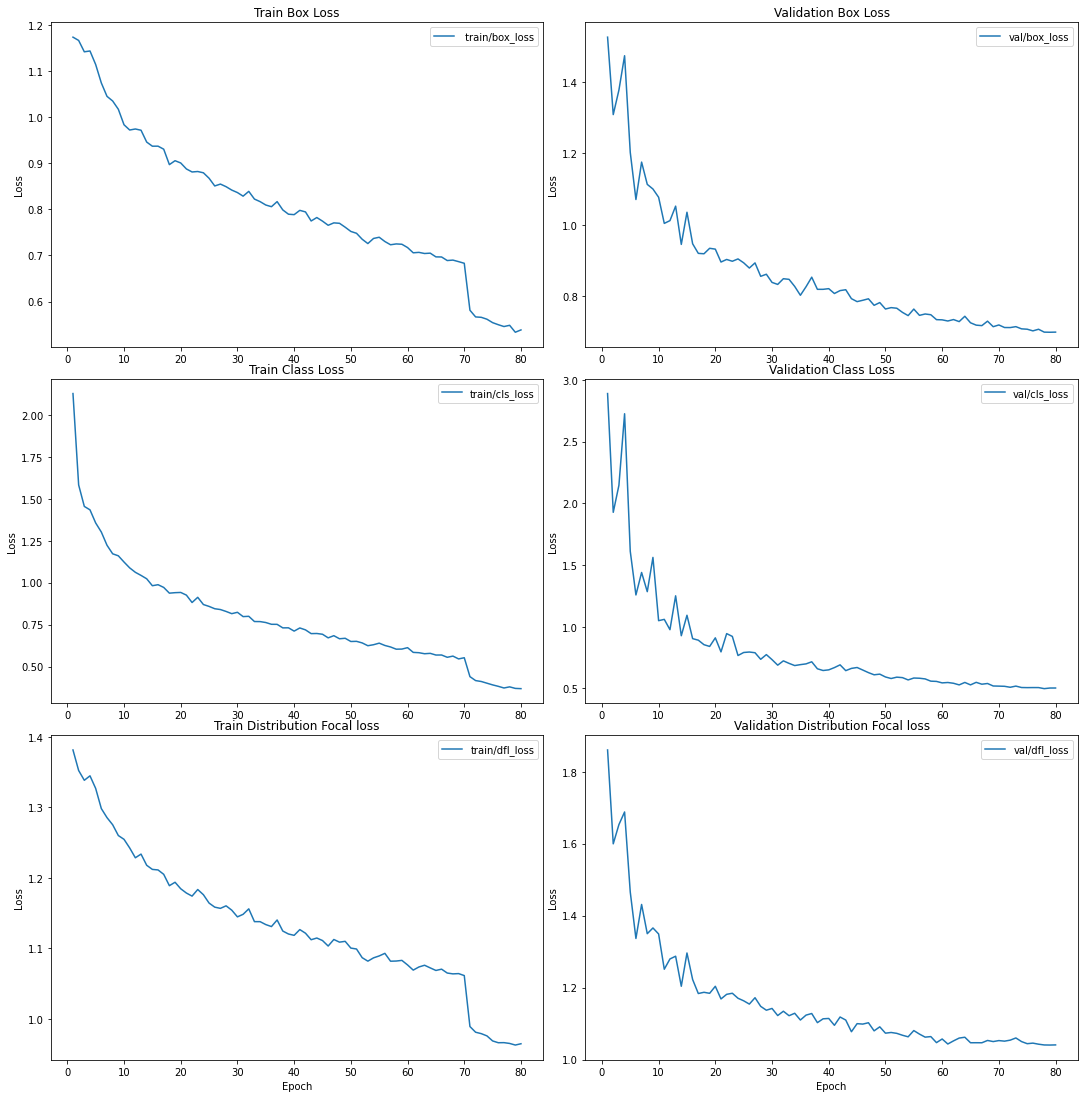

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout()

# train/box_loss
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label=' train/box_loss')
axes[0, 0].set_title('Train Box Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# val/box_loss
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='val/box_loss')
axes[0, 1].set_title('Validation Box Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# train/cls_loss
axes[1, 0].plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
axes[1, 0].set_title('Train Class Loss')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# val/cls_loss
axes[1, 1].plot(df['epoch'], df['val/cls_loss'], label='val/cls_loss')
axes[1, 1].set_title('Validation Class Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

# train/dfl_loss
axes[2, 0].plot(df['epoch'], df['train/dfl_loss'], label='train/dfl_loss')
axes[2, 0].set_title('Train Distribution Focal loss')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

# val/dfl_loss
axes[2, 1].plot(df['epoch'], df['val/dfl_loss'], label='val/dfl_loss')
axes[2, 1].set_title('Validation Distribution Focal loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

plt.show()

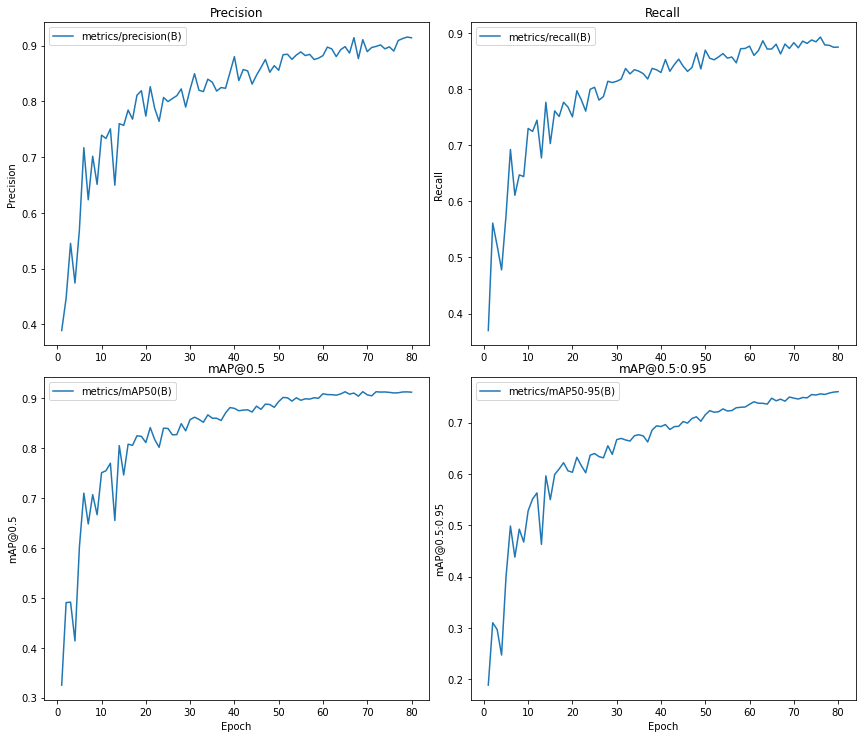

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# metrics/precision(B)
axes[0, 0].plot(df['epoch'], df['metrics/precision(B)'], label='metrics/precision(B)')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# metrics/recall(B)
axes[0, 1].plot(df['epoch'], df['metrics/recall(B)'], label='metrics/recall(B)')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# График для metrics/mAP50(B)
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='metrics/mAP50(B)')
axes[1, 0].set_title('mAP@0.5')
axes[1, 0].set_ylabel('mAP@0.5')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()

# metrics/mAP50-95(B)
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='metrics/mAP50-95(B)')
axes[1, 1].set_title('mAP@0.5:0.95')
axes[1, 1].set_ylabel('mAP@0.5:0.95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()

plt.show()

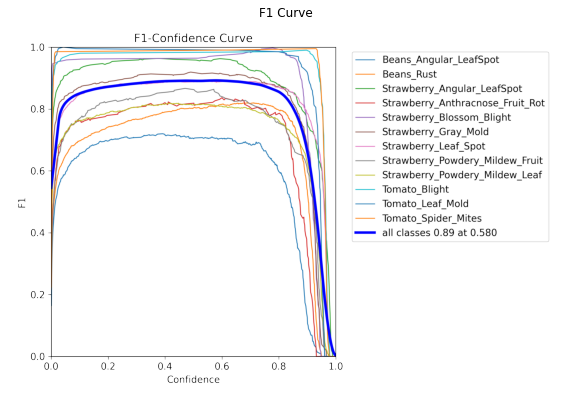

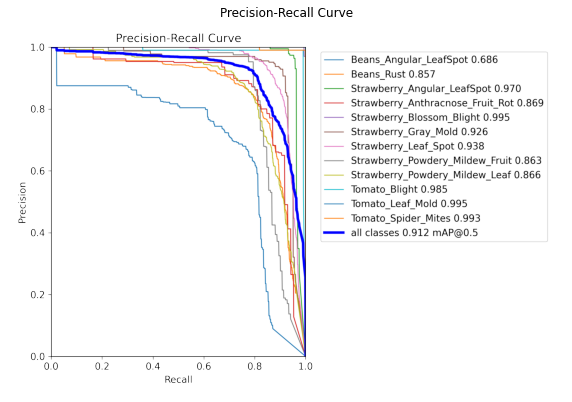

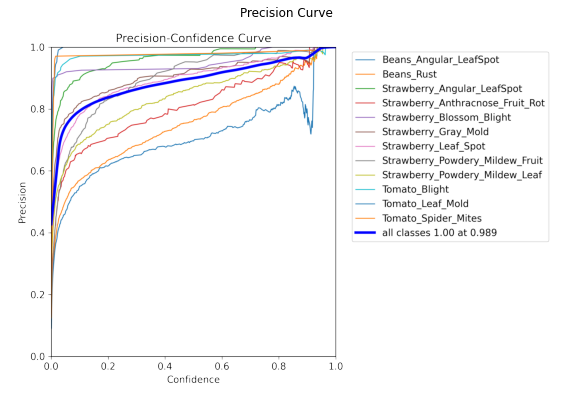

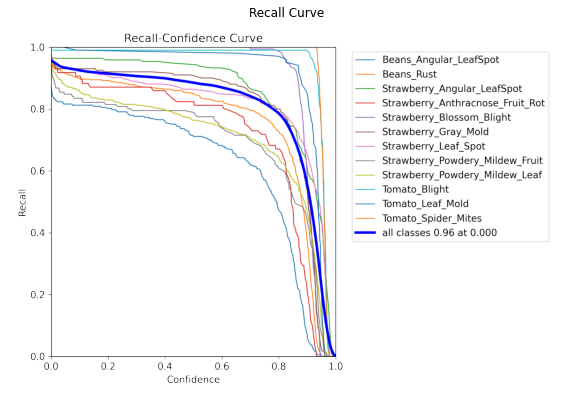

In [9]:
# F1_curve.png
f1_curve = Image.open("YOLO11s/Small_try/F1_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(f1_curve)
plt.title("F1 Curve")
plt.axis("off")
plt.show()

# PR_curve.png
pr_curve = Image.open("YOLO11s/Small_try/PR_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(pr_curve)
plt.title("Precision-Recall Curve")
plt.axis("off")
plt.show()

# P_curve.png
p_curve = Image.open("YOLO11s/Small_try/P_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(p_curve)
plt.title("Precision Curve")
plt.axis("off")
plt.show()

# R_curve.png
r_curve = Image.open("YOLO11s/Small_try/R_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(r_curve)
plt.title("Recall Curve")
plt.axis("off")
plt.show()

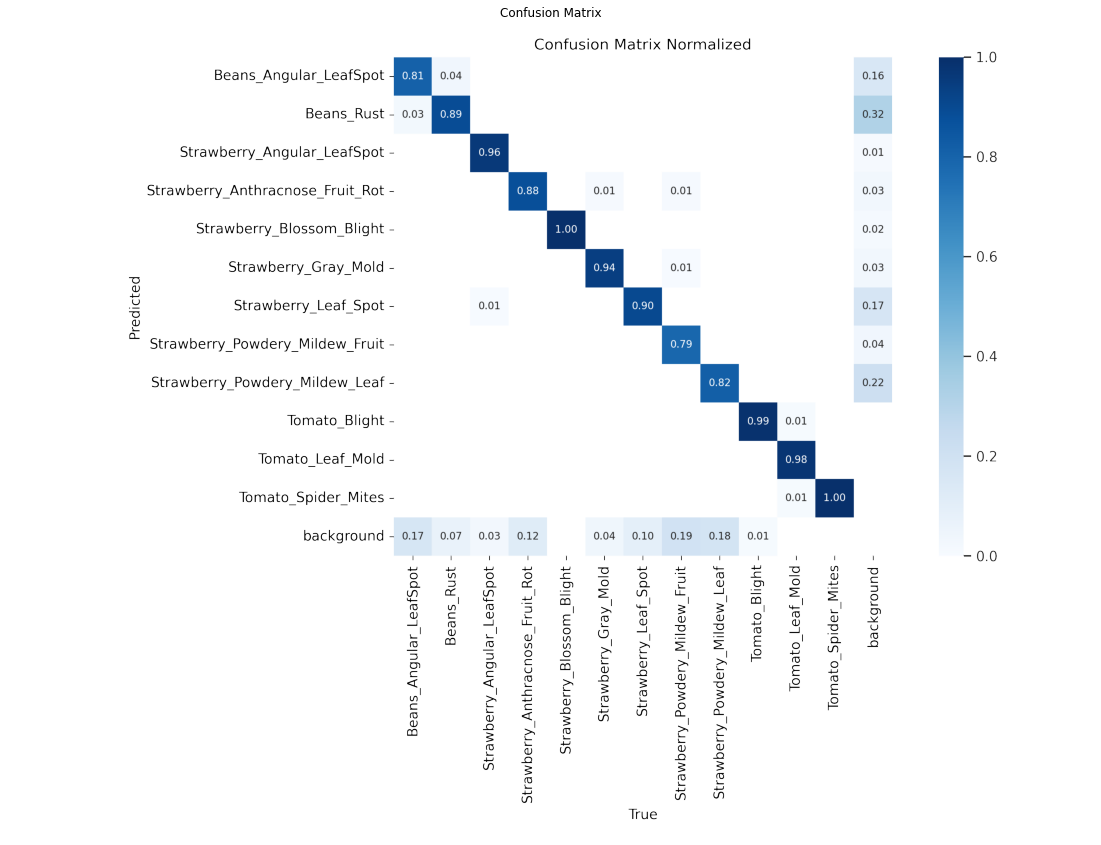

In [10]:
confusion_matrix = Image.open("YOLO11s/Small_try/confusion_matrix_normalized.png")
plt.figure(figsize=(20, 15))
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()


image 1/1 /home/user/CourseWork/Disease/test/images/1619349070358_jpg.rf.598983cd4477c6faf4dbb5dcd65f989a.jpg: 416x416 4 Beans_Angular_LeafSpots, 9.4ms
Speed: 0.7ms preprocess, 9.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)


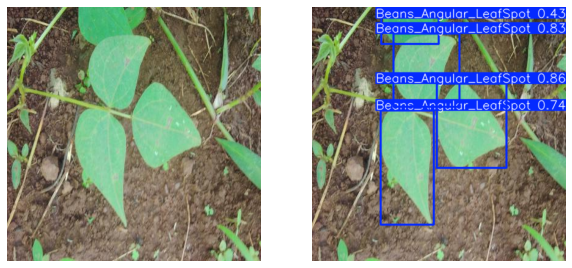

In [11]:
res = model('test/images/1619349070358_jpg.rf.598983cd4477c6faf4dbb5dcd65f989a.jpg')
detect_img = res[0].plot()
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Отображение первого изображения
axes[0].imshow(plt.imread('test/images/1619349070358_jpg.rf.598983cd4477c6faf4dbb5dcd65f989a.jpg'))
axes[0].axis('off')

# Отображение результатов модели
axes[1].imshow(detect_img)
axes[1].axis('off')

plt.show();